In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o arquivo CSV
file_path = '../../../datasets/b3_dados/processed/acoes_concat.csv'
acoes_data = pd.read_csv(file_path)

# Converter a coluna 'Date' para datetime e defini-la como índice
acoes_data['Date'] = pd.to_datetime(acoes_data['Date'])
acoes_data.set_index('Date', inplace=True)

1. **Histogramas**

Objetivo: Mostrar a distribuição dos preços de fechamento em um intervalo de valores.

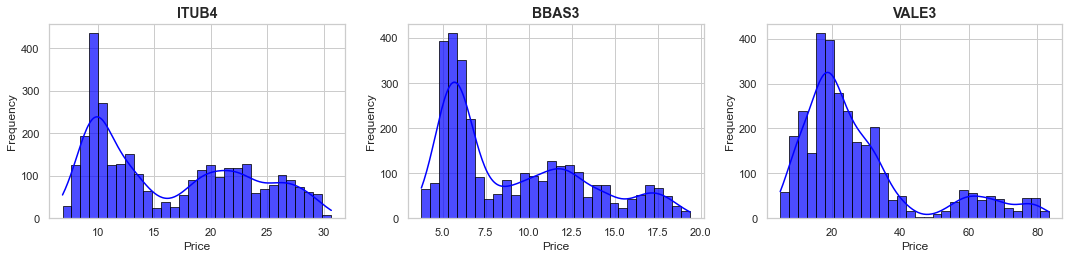

In [7]:

def plot_histograms(data, stocks):
    # Configuração do estilo do Seaborn
    sns.set(style="whitegrid")  # Fundo com grade
    sns.set_palette("husl")  # Paleta de cores mais vibrante
    
    # Criação da figura e dos subplots
    plt.figure(figsize=(20, 10))
    for i, stock in enumerate(stocks, 1):
        plt.subplot(3, 4, i)  # Ajuste o layout conforme o número de ações
        sns.histplot(data[stock], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7)
        plt.title(f'{stock}', fontsize=14, fontweight='bold')
        plt.xlabel('Price', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    
    # Ajustes finais
    plt.tight_layout()
    plt.show()

# Exemplo de uso
plot_histograms(acoes_data, ['ITUB4', 'BBAS3', 'VALE3'])

**boxplot em relação ao tempo** 

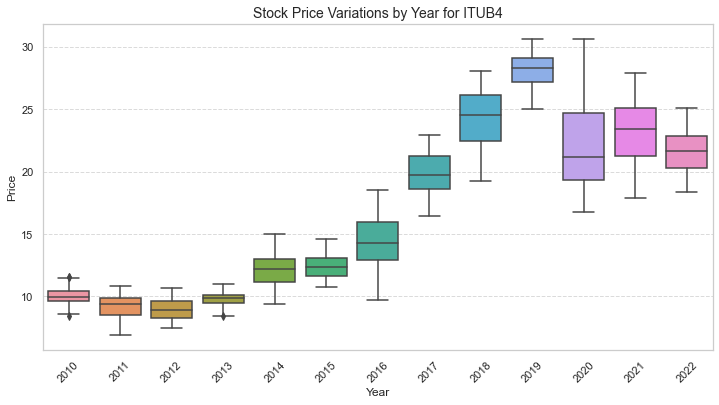

In [12]:
import seaborn as sns

# Function to create a boxplot for a specific stock using seaborn
def create_seaborn_boxplot(data, stock_column, title_prefix="Price Variations"):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='Year', y=stock_column)
    plt.title(f'{title_prefix} by Year for {stock_column}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example: Boxplot for 'ITUB4' using seaborn
create_seaborn_boxplot(acoes_data, 'ITUB4', "Stock Price Variations")


**Gráfico de Violino em conjunto com Boxplot**

1. função para plotar o gráfico que será uma junção do boxplot com gráfico violino

In [3]:
# Função para criar gráficos de violino com boxplot
# Recebe os dados, o título do gráfico e o rótulo do eixo y
def plot_violin_boxplot(data, title, ylabel):
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=data, inner=None, linewidth=1)  # Gráfico de violino
    sns.boxplot(data=data, whis=1.5, width=0.2, linewidth=1, color='lightgrey')  # Boxplot sobreposto
    plt.title(title, fontsize=16)  # Título do gráfico
    plt.ylabel(ylabel, fontsize=12)  # Rótulo do eixo Y
    plt.xlabel('Stocks', fontsize=12)  # Rótulo do eixo X
    plt.xticks(rotation=45)  # Rotação dos rótulos do eixo X
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grade no eixo Y
    plt.tight_layout()  # Ajustar layout
    plt.show()

2. Nosso primeiro gráfico será os dados diários de fechamento das ações

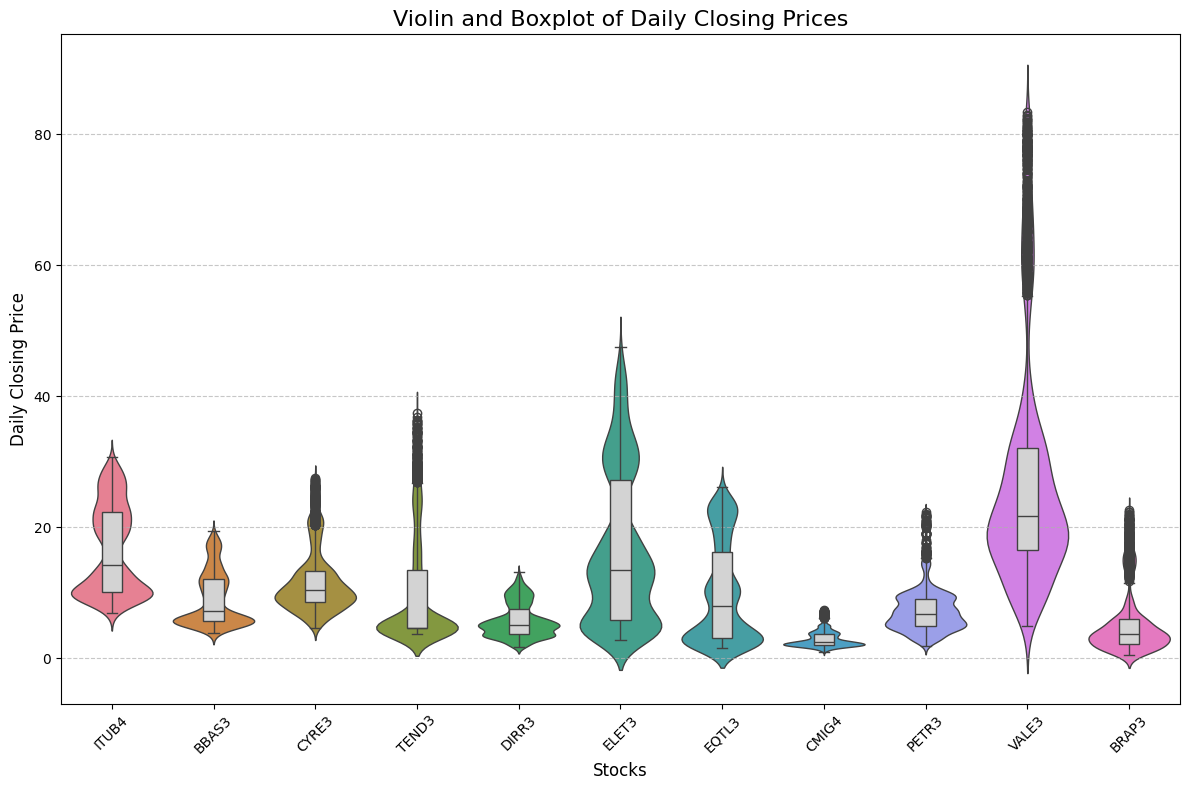

In [4]:
# Gerar gráficos para granularidade diária
plot_violin_boxplot(acoes_data,
                    "Violin and Boxplot of Daily Closing Prices",
                    "Daily Closing Price")

3. Alteramos a granularidade para dados anuais

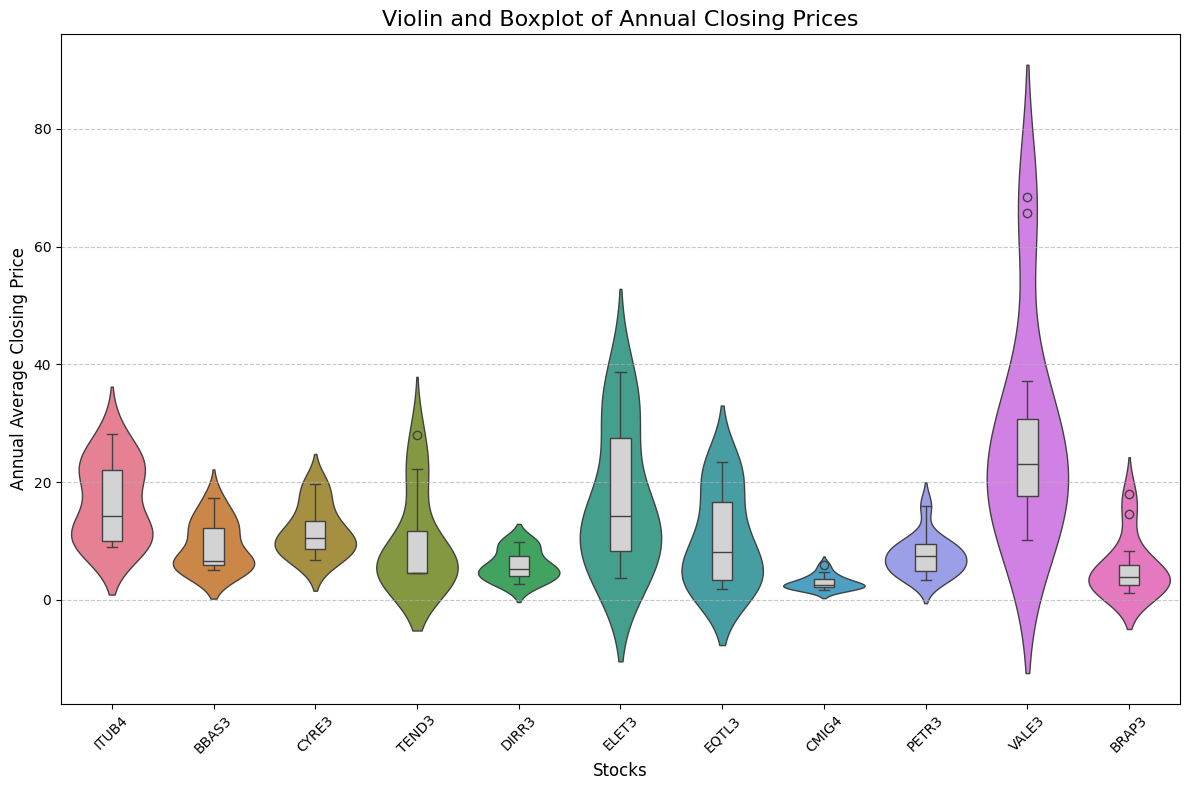

In [5]:
# Alterar granularidade para anual (média dos preços de fechamento)
acoes_annual = acoes_data.resample('YE').mean()
plot_violin_boxplot(acoes_annual,
                    "Violin and Boxplot of Annual Closing Prices",
                    "Annual Average Closing Price")

4. Agora a granularidade será trimestral

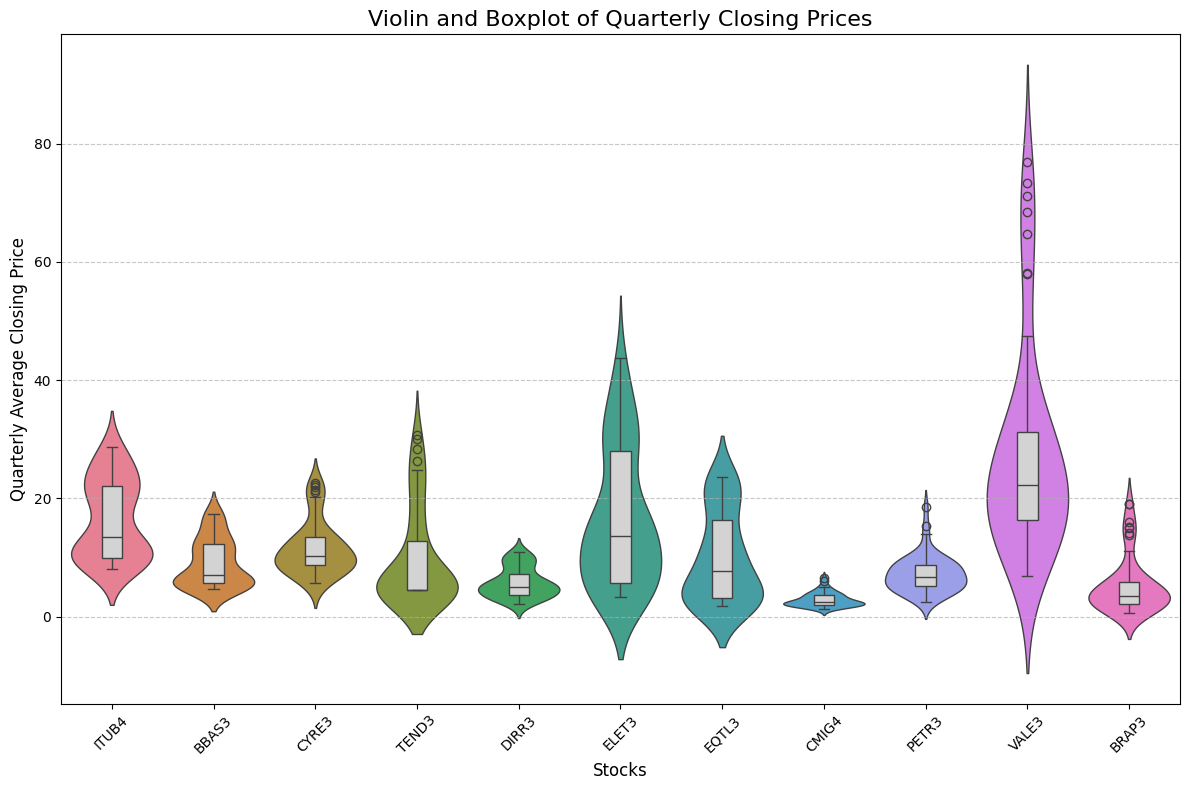

In [6]:
# Alterar granularidade para trimestral (média dos preços de fechamento)
acoes_quarterly = acoes_data.resample('QE').mean()
plot_violin_boxplot(acoes_quarterly,
                    "Violin and Boxplot of Quarterly Closing Prices",
                    "Quarterly Average Closing Price")

5. Vamos pegar os dados a partir de 2019 (nossos dados originais iniciam em janeiro de 2010 e vão até setembro de 2022). Em seguida, vamos pegar granularidades diferentes: diária, mensal, triemstral e anual

In [7]:
# Filtrar os dados para a partir de 2019
acoes_2019 = acoes_data[acoes_data.index.year >= 2019]

# Gerar gráficos para granularidades diárias, mensais, trimestrais e anuais (dados a partir de 2019)
acoes_daily_2019 = acoes_2019
acoes_monthly_2019 = acoes_2019.resample('ME').mean()  # Mensal
acoes_quarterly_2019 = acoes_2019.resample('QE').mean()  # Trimestral
acoes_annual_2019 = acoes_2019.resample('YE').mean()  # Anual

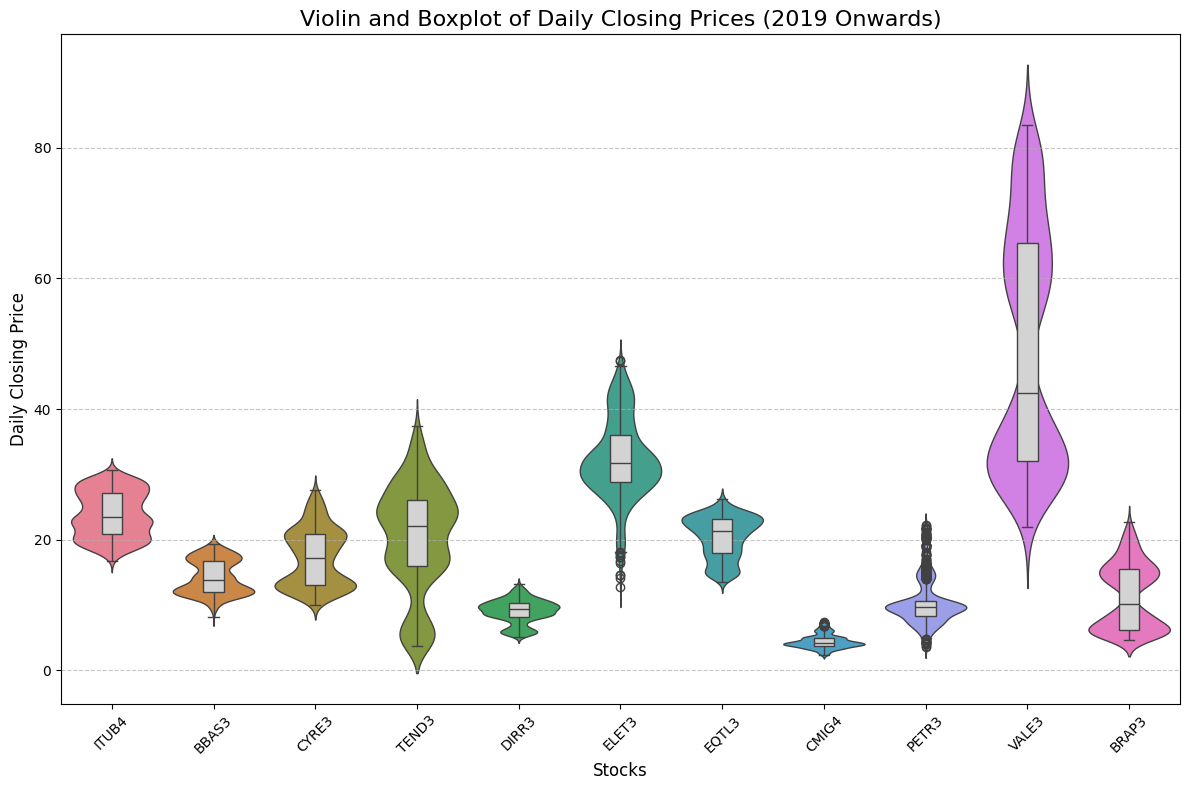

In [8]:
#diários
plot_violin_boxplot(acoes_daily_2019,
                    "Violin and Boxplot of Daily Closing Prices (2019 Onwards)",
                    "Daily Closing Price")

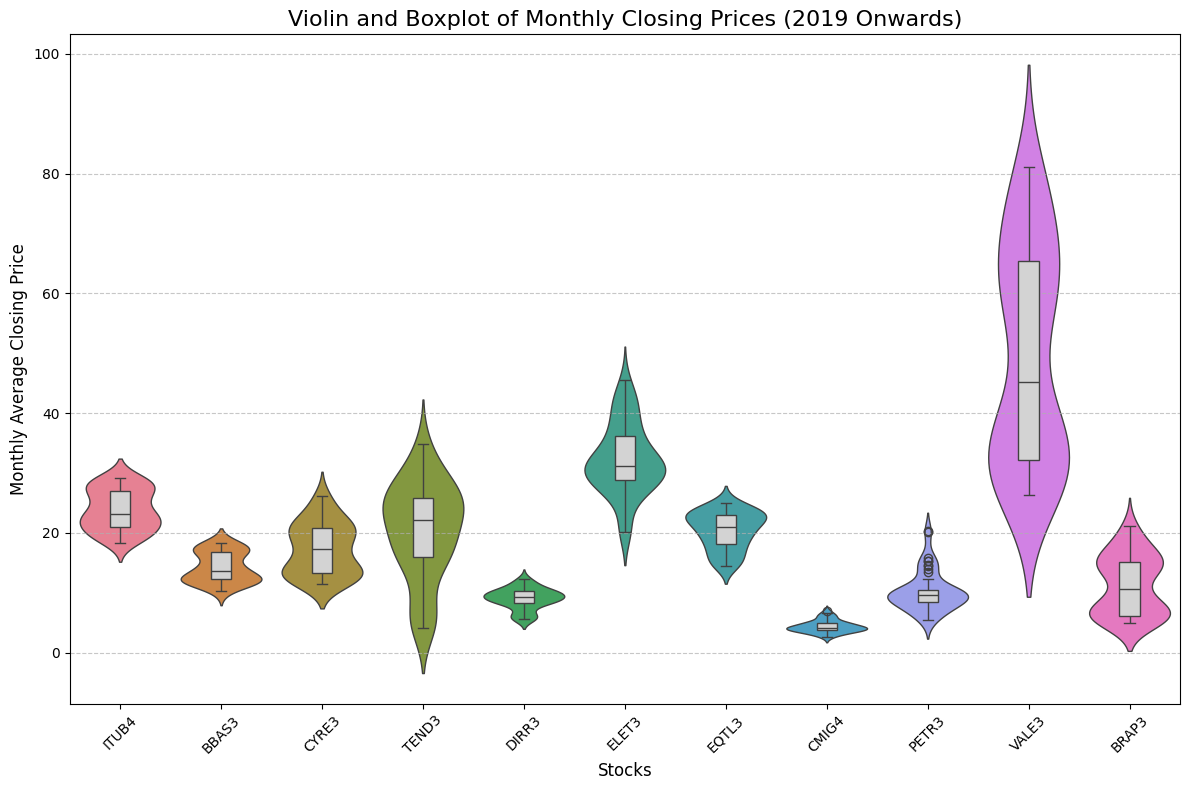

In [9]:
#mensal
plot_violin_boxplot(acoes_monthly_2019,
                    "Violin and Boxplot of Monthly Closing Prices (2019 Onwards)",
                    "Monthly Average Closing Price")

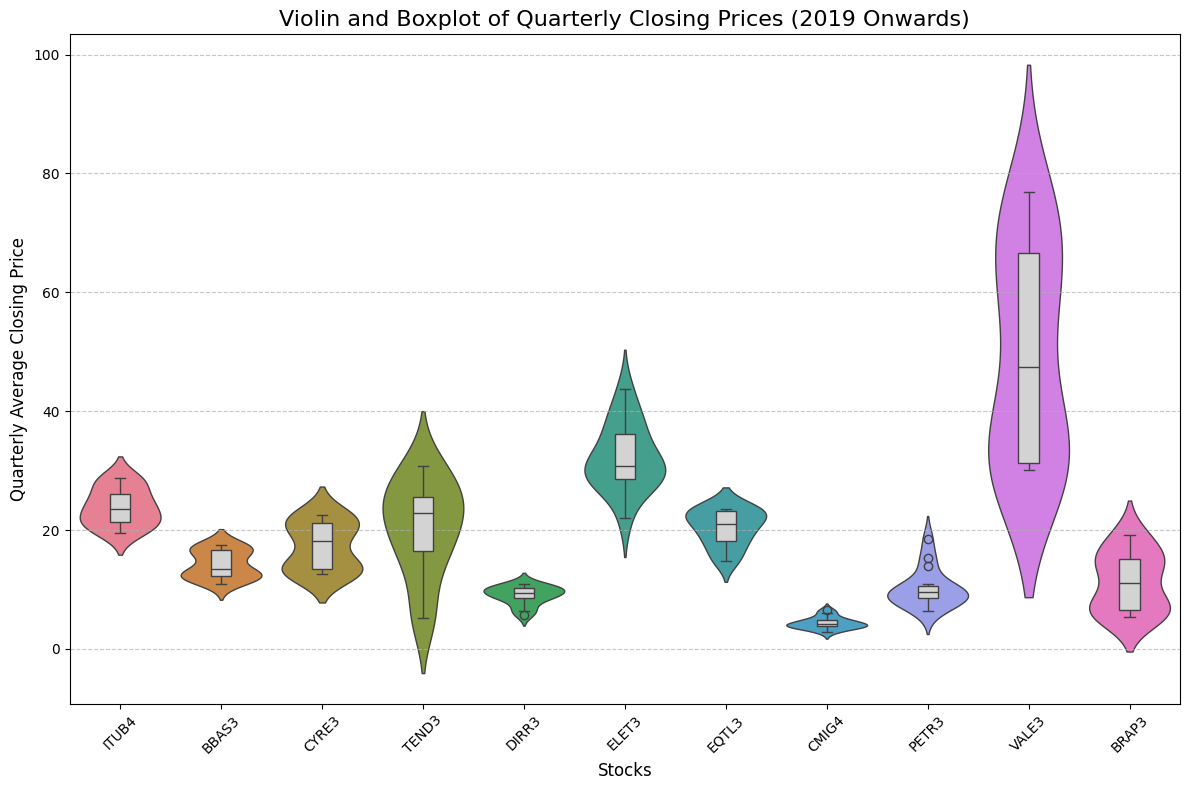

In [10]:
#trimestral
plot_violin_boxplot(acoes_quarterly_2019,
                    "Violin and Boxplot of Quarterly Closing Prices (2019 Onwards)",
                    "Quarterly Average Closing Price")


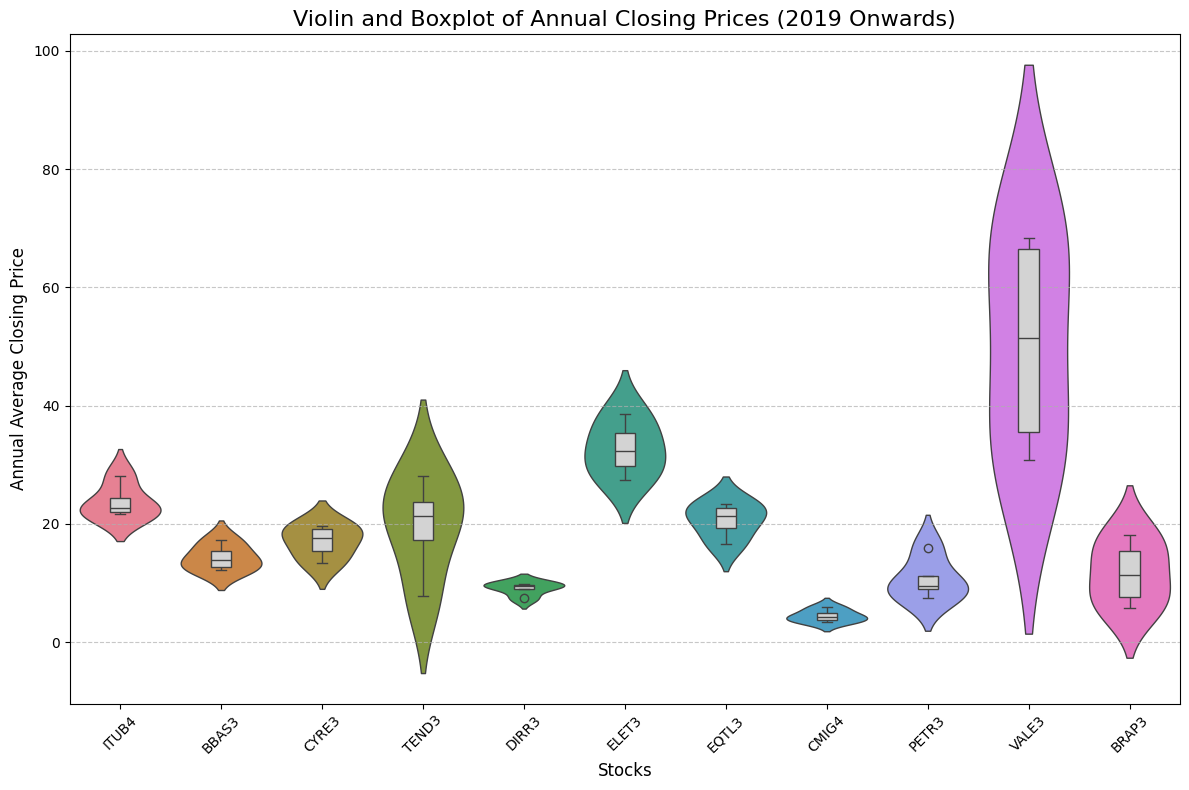

In [11]:
#anual
plot_violin_boxplot(acoes_annual_2019,
                    "Violin and Boxplot of Annual Closing Prices (2019 Onwards)",
                    "Annual Average Closing Price")